<a href="https://colab.research.google.com/github/YousefAbyss/2022-Fall/blob/main/StatMech_project01/Entropy_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import Boltzmann
from scipy.spatial import KDTree

In [73]:
def entropy_change(n, vi, vf):
  return n * Boltzmann * np.log(vf / vi)

In [74]:
def data_creator(n_particles, vel, high_x, high_y, low_x=0, low_y=0):
    '''this function creates the initial position and direction of particles'''
    angle = np.random.uniform(low=0, high=2*np.pi, size=n_particles)  # random initial directions
    r = np.zeros((2,n_particles))
    r[0] = np.random.uniform(low=low_x, high=high_x, size=n_particles)  # random initial x positions
    r[1] = np.random.uniform(low=low_y, high=high_y, size=n_particles)  # random initial y positions
    v = np.zeros((2,n_particles))
    for i in range(n_particles):
        v[0][i] = vel * np.cos(angle[i])  # random initial x velocities
        v[1][i] = vel * np.sin(angle[i])  # random initial y velocities
    return r, v

In [75]:
number_of_particles = 100
velocity = 0.5
box_length = 10
radius = 0

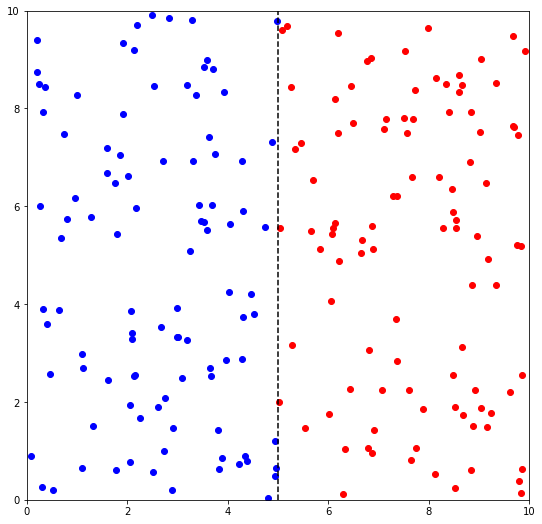

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
data1 = data_creator(number_of_particles, velocity, box_length/2, box_length)
data2 = data_creator(number_of_particles, velocity, box_length, box_length, low_x=box_length/2)
x1, y1 = data1[0][0], data1[0][1]
x2, y2 = data2[0][0], data2[0][1]
ax.plot(x1, y1, 'o', c='blue')
ax.plot(x2, y2, 'o', c='red')
ax.set_xlim(0, box_length)
ax.set_ylim(0, box_length)
ax.axvline(x=box_length/2, ymin=0, ymax=box_length, c='black', ls='--')
plt.show()

In [77]:
def motion(r, v, ts, dt):
    """calculates position of each particle with time step dt"""
    rs = np.zeros((ts, r.shape[0], r.shape[1]))
    vs = np.zeros((ts, v.shape[0], v.shape[1]))
    #  Initial State
    rs[0] = r.copy()
    vs[0] = v.copy()
    for i in range(1, ts):

        #  reflection
        v[0, (r[0] + radius) > box_length] = -np.abs(v[0, (r[0] + radius) > box_length])
        v[0, (r[0] - radius) < 0] = np.abs(v[0, (r[0] - radius) < 0])
        v[1, (r[1] + radius) > box_length] = -np.abs(v[1, (r[1] + radius) > box_length])
        v[1, (r[1] - radius) < 0] = np.abs(v[1, (r[1] - radius) < 0])
        
        r = r + v*dt
        rs[i] = r.copy()
        vs[i] = v.copy()
    return rs, vs

In [78]:
v1, v2 = data1[1], data2[1]
V = np.array([np.append(v1[0], v2[0]), np.append(v1[1], v2[1])])
X, Y = np.append(x1, x2), np.append(y1, y2)

In [79]:
rs, vs = motion(np.array([X, Y]), V, ts=2000, dt=1)
Xt, Yt = rs[-1][0], rs[-1][1]

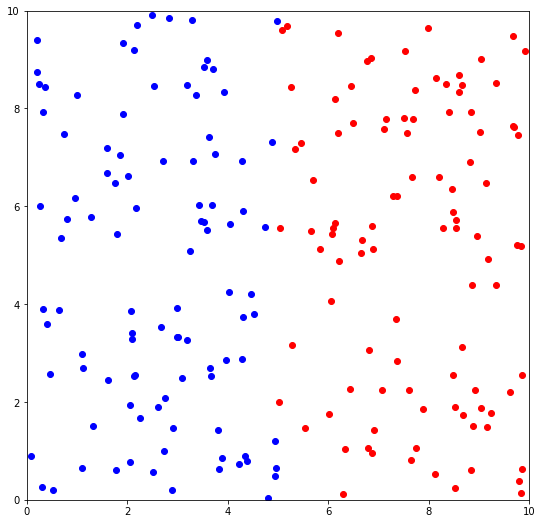

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
ax.plot(X[:100], Y[:100], 'o', c='blue')
ax.plot(X[100:200], Y[100:200], 'o', c='red')
ax.set_xlim(0, box_length)
ax.set_ylim(0, box_length)
plt.show()

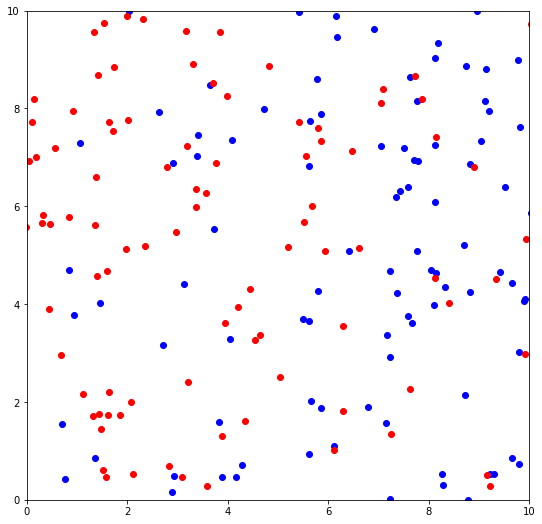

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
ax.plot(Xt[:100], Yt[:100], 'o', c='blue')
ax.plot(Xt[100:200], Yt[100:200], 'o', c='red')
ax.set_xlim(0, box_length)
ax.set_ylim(0, box_length)
plt.show()

In [82]:
entropy_1 = entropy_change(number_of_particles, box_length/2, box_length)
entropy_2 = entropy_change(number_of_particles, box_length/2, box_length)
entropy_tot = entropy_1 + entropy_2
print(f'''
change of entropy for blue gas = {entropy_1}
change of entropy for red gas = {entropy_2}
entropy of the final mix = {entropy_tot}''')


change of entropy for blue gas = 9.56992961692908e-22
change of entropy for red gas = 9.56992961692908e-22
entropy of the final mix = 1.913985923385816e-21
